In [1]:
import pandas as pd
data=pd.read_csv('diamonds.csv',index_col=0)

In [2]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
del data['x']
del data['y']
del data['z']

In [4]:
data['cut']=data['cut'].replace('Ideal',4)
data['cut']=data['cut'].replace('Premium',3)
data['cut']=data['cut'].replace('Very Good',2)
data['cut']=data['cut'].replace('Good',1)
data['cut']=data['cut'].replace('Fair',0)

In [5]:
data['color']=data['color'].replace('D',6)
data['color']=data['color'].replace('E',5)
data['color']=data['color'].replace('F',4)
data['color']=data['color'].replace('G',3)
data['color']=data['color'].replace('H',2)
data['color']=data['color'].replace('I',1)
data['color']=data['color'].replace('J',0)

In [6]:
data['clarity']=data['clarity'].replace('FL',0)
data['clarity']=data['clarity'].replace('IF',1)
data['clarity']=data['clarity'].replace('VVS1',2)
data['clarity']=data['clarity'].replace('VVS2',3)
data['clarity']=data['clarity'].replace('VS1',4)
data['clarity']=data['clarity'].replace('VS2',5)
data['clarity']=data['clarity'].replace('SI1',6)
data['clarity']=data['clarity'].replace('SI2',7)
data['clarity']=data['clarity'].replace('I1',8)
data['clarity']=data['clarity'].replace('I2',9)
data['clarity']=data['clarity'].replace('I3',10)


In [7]:
X, y = data.iloc[:,:-1], data.iloc[:,-1] 
print(X.shape, y.shape)

(53940, 6) (53940,)


In [8]:
X

,carat,cut,color,clarity,depth,table
1,0.23,4,5,7,61.5,55.0
2,0.21,3,5,6,59.8,61.0
3,0.23,1,5,4,56.9,65.0
4,0.29,3,1,5,62.4,58.0
5,0.31,1,0,7,63.3,58.0
...,...,...,...,...,...,...
53936,0.72,4,6,6,60.8,57.0
53937,0.72,1,6,6,63.1,55.0
53938,0.70,2,6,6,62.8,60.0
53939,0.86,3,2,7,61.0,58.0


In [9]:
y

1         326
2         326
3         327
4         334
5         335
         ... 
53936    2757
53937    2757
53938    2757
53939    2757
53940    2757
Name: price, Length: 53940, dtype: int64

In [178]:
import statsmodels.api as sm 
X1 = sm.add_constant(X)
reg = sm.OLS(y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 8.503e+04
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:54:30   Log-Likelihood:            -4.6046e+05
No. Observations:               53940   AIC:                         9.209e+05
Df Residuals:                   53933   BIC:                         9.210e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2280.1229    381.124      5.983      0.000    1533.116    3027.130
carat       8793.8028     12.765    688.889      0.000    8768.783    8818.823
cut          122.4541      5.791     21.144      0.000     111.103     133.805
color        318.1991      3.303     96.346      0.000     311.726     324.672
clarity     -521.9017      3.533   -147.719      0.000    -528.827    -514.977
depth        -44.4921      4.261    -10.442      0.000     -52.843     -36.141
table        -25.6425      2.985     -8.590      0.000     -31.493     -19.792
==============================================================================
Omnibus:                    10791.729   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           250931.890
Skew:                           0.368   Prob(JB):                         0.00
Kurtosis:                      13.541   Cond. No.                     6.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
from sklearn.tree import DecisionTreeRegressor as dtr
test_reg = dtr(max_depth=5, random_state=42)
test_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [246]:
print(test_reg.score(X_train,y_train))
print(test_reg.score(X_test, y_test))

0.9662162520827754
0.9649543302800084


In [154]:
test_reg.score(X_test, y_test)

0.9764426925975466

In [247]:
new_reg=dtr(max_depth=5, random_state=42)
new_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [239]:
print(new_reg.score(X_train,y_train))
print(new_reg.score(X_test, y_test))

0.940449635782081
0.9382421434557799


In [248]:
from six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image
col_names=['carat','cut','color','clarity','depth','table']

In [249]:
# 문자열 데이터를저장하는 역할
dot_file =StringIO()
# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 데이터를 보일지
tree.export_graphviz(new_reg,  feature_names=col_names, out_file = dot_file, filled =True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 
graph.write_png("Example_RT.jpg")

True

In [ ]:
metrics.precision_score(y_test, y_predict)

In [12]:
col_names=['carat','cut','color','clarity','depth','table']

In [14]:
feature_imp = test_reg.feature_importances_
feature_imp

array([0.89042946, 0.0028165 , 0.03305205, 0.06805566, 0.00391932,
       0.001727  ])

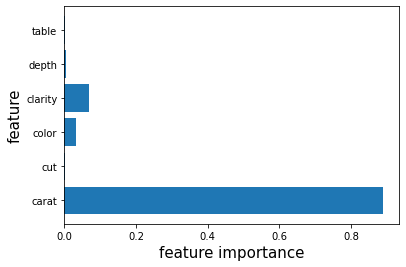

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
n_feature = X_train.shape[1]

idx = np.arange(n_feature)

plt.barh(idx, feature_imp, align='center')

plt.yticks(idx, col_names[:])

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [102]:
col_names

['carat', 'cut', 'color', 'clarity', 'depth', 'table']

In [277]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators=96, oob_score=True, max_features=6, \
                                  criterion='mse', max_depth=3, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features=6, n_estimators=96,
                      oob_score=True, random_state=42)

In [282]:
rfr.oob_score_

0.890095268845767

In [286]:
y_pred

array([ 785.64546105, 1678.58869867,  785.64546105, ...,  785.64546105,
       8362.2578165 , 5343.81299006])

In [287]:
y_test

1389      559
50053    2201
41646    1238
42378    1304
17245    6901
         ... 
44082    1554
23714     633
31376     761
21773    9836
4999     3742
Name: price, Length: 10788, dtype: int64

In [ ]:
y_pred =  classifier.predict(x_test)
print(f1_score(y_test,y_pred, average="macro"))

In [278]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.8910330066026835
0.8888381338959256


In [99]:
print(f'Random forest feature importances: {rfr.feature_importances_}')

Random forest feature importances: [0.91967223 0.         0.02100407 0.0593237  0.         0.        ]


In [105]:
importances = rfr.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([0, 3, 2, 5, 4, 1], dtype=int64)

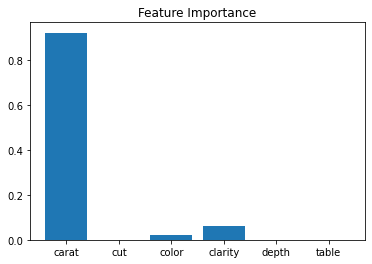

In [110]:
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances)

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), col_names)

# Show plot
plt.show()


C:\Users\BM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\BM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


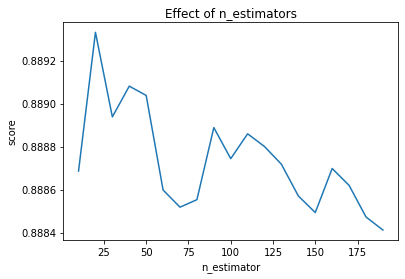

In [279]:
# random forest에 속한 decision tree별 성능변화
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rfr.set_params(n_estimators=n)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [193]:
gbr_b = GradientBoostingRegressor(max_depth=9,random_state=42)
gbr_b
gbr_b.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=9, random_state=42)

In [229]:
# GradientBoosting#
from sklearn.ensemble import GradientBoostingRegressor

gbr_b = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, max_features=6,
                          n_estimators=96, random_state=42)
gbr_b
gbr_b.fit(X_train,y_train)

GradientBoostingRegressor(max_features=6, n_estimators=96, random_state=42)

In [230]:
gbr_b.score(X_train,y_train)

0.9764143621584078

In [231]:
gbr_b.score(X_test,y_test)

0.9760234599152329

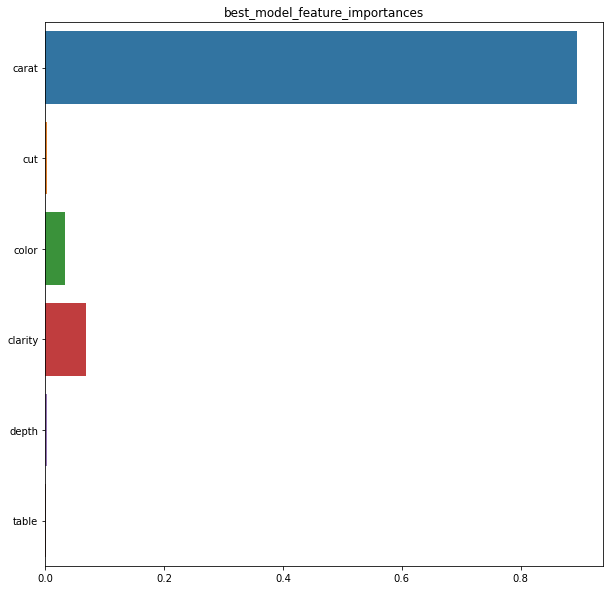

In [111]:
# feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
import seaborn as sns

ft_importances = pd.Series(gbr_b.feature_importances_, index = col_names)

plt.figure(figsize=(10,10))
plt.title("best_model_feature_importances")
sns.barplot(x=ft_importances, y=col_names)
plt.show()